In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from train.train_semihebb import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *

# Model Performance Comparison on CIFAR10

five semihebbnets, with the same network depth, the same #neurons on each layer, the same training (1 epoch). we evaluate and compare performance across different HebbLayers & LinearLayers combinations.

50000
10000


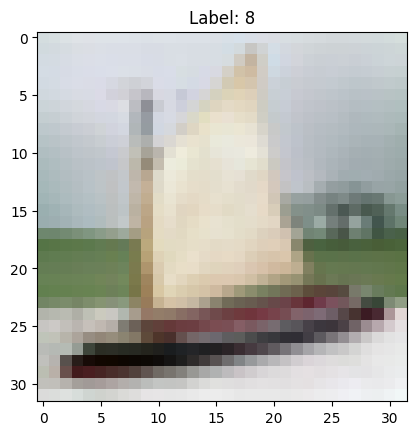

Epoch: 0, Step: 0, Loss: 2.3001868724823, Accuracy: 19.59%
Epoch: 0, Step: 50, Loss: 2.583305597305298, Accuracy: 21.77%
Epoch: 0, Step: 100, Loss: 1.8416410684585571, Accuracy: 34.99%
Epoch: 0, Step: 150, Loss: 1.8665270805358887, Accuracy: 33.9%
Epoch: 0, Step: 200, Loss: 2.075249433517456, Accuracy: 30.66%
Epoch: 0, Step: 250, Loss: 1.9496259689331055, Accuracy: 33.08%
Epoch: 0, Step: 300, Loss: 1.7864338159561157, Accuracy: 31.65%
Epoch: 0, Step: 350, Loss: 1.8408552408218384, Accuracy: 32.37%
Epoch: 0, Step: 400, Loss: 2.07452654838562, Accuracy: 31.95%
Epoch: 0, Step: 450, Loss: 2.551642417907715, Accuracy: 33.83%
Epoch: 0, Step: 500, Loss: 2.0739963054656982, Accuracy: 35.12%
Epoch: 0, Step: 550, Loss: 1.9561402797698975, Accuracy: 36.11%
Epoch: 0, Step: 600, Loss: 1.8732370138168335, Accuracy: 35.86%
Epoch: 0, Step: 650, Loss: 1.759340763092041, Accuracy: 35.18%
Epoch: 0, Step: 700, Loss: 1.8267319202423096, Accuracy: 36.93%
Epoch: 0, Step: 750, Loss: 1.749776005744934, Accurac

In [5]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1         
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_cifar10(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

# 4+1
hebbnet = HebbNet([3072,1000,2000,4000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet_4_1 = SemiHebbNet(hebbnet, fcn)

# 3+2
hebbnet = HebbNet([3072,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([4000,2000,10])

semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)

# 2+3
hebbnet = HebbNet([3072,1000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,4000,2000,10])

semihebbnet_2_3 = SemiHebbNet(hebbnet, fcn)

# 1+4
hebbnet = HebbNet([3072,1000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([1000,2000,4000,2000,10])

semihebbnet_1_4 = SemiHebbNet(hebbnet, fcn)

models = [semihebbnet_1_4,semihebbnet_2_3,semihebbnet_3_2,semihebbnet_4_1]
model_names = ["semihebbnet_1_4","semihebbnet_2_3","semihebbnet_3_2","semihebbnet_4_1"]

raw_accuracies = []
for model in models:
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                  

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    raw_accuracies.append(accuracies)


ratio = [0.8,0.6,0.4,0.2]

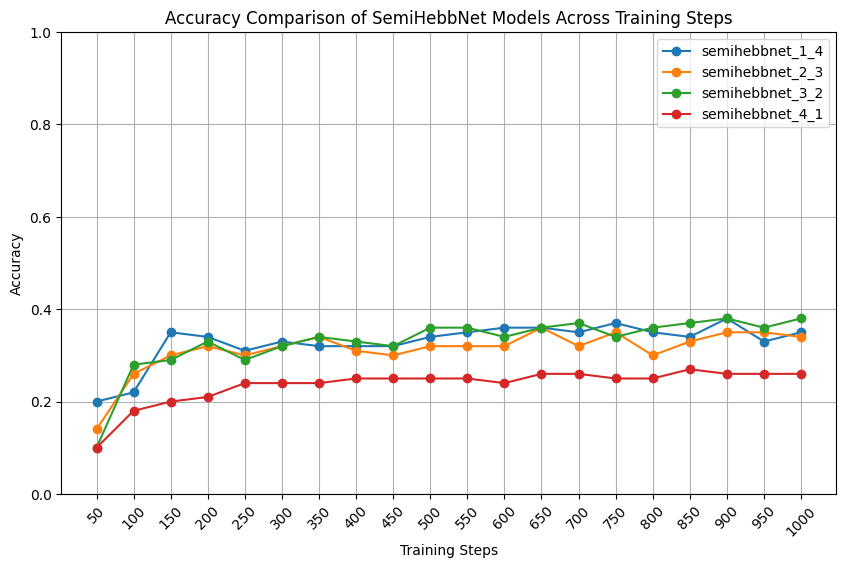

In [6]:
#plot
def plot_accuracy_comparison(accuracies, model_names):
    plt.figure(figsize=(10, 6))
    
    for i, model_accuracies in enumerate(accuracies):
        steps = [step * 50 for step in range(1, len(model_accuracies) + 1)]
        plt.plot(steps, model_accuracies, marker='o', label=model_names[i])

    plt.title('Accuracy Comparison of SemiHebbNet Models Across Training Steps')
    plt.xlabel('Training Steps')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.xticks(steps, rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

plot_accuracy_comparison(raw_accuracies, model_names)

# Model Performance Comparison on MNIST

five semihebbnets, with the same network depth, the same #neurons on each layer, the same training (1 epoch). we evaluate and compare performance across different HebbLayers & LinearLayers combinations.

60000
10000


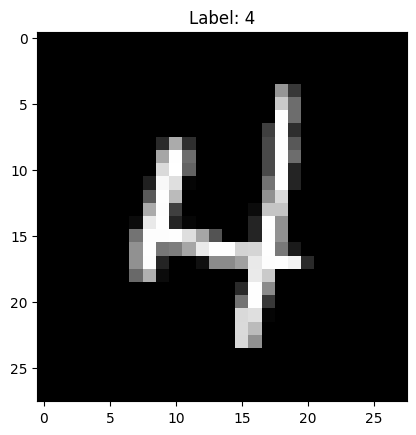

Epoch: 0, Step: 0, Loss: 2.3028066158294678, Accuracy: 18.73%
Epoch: 0, Step: 50, Loss: 0.7473638653755188, Accuracy: 75.94%
Epoch: 0, Step: 100, Loss: 0.5446025729179382, Accuracy: 85.2%
Epoch: 0, Step: 150, Loss: 0.9766598343849182, Accuracy: 80.68%
Epoch: 0, Step: 200, Loss: 0.6025358438491821, Accuracy: 81.47%
Epoch: 0, Step: 250, Loss: 0.332175076007843, Accuracy: 82.58%
Epoch: 0, Step: 300, Loss: 0.8706893920898438, Accuracy: 86.52%
Epoch: 0, Step: 350, Loss: 0.5938215851783752, Accuracy: 85.64%
Epoch: 0, Step: 400, Loss: 0.48611024022102356, Accuracy: 87.79%
Epoch: 0, Step: 450, Loss: 0.4019814729690552, Accuracy: 89.45%
Epoch: 0, Step: 500, Loss: 0.522421658039093, Accuracy: 87.33%
Epoch: 0, Step: 550, Loss: 0.3007047176361084, Accuracy: 90.11%
Epoch: 0, Step: 600, Loss: 0.27539265155792236, Accuracy: 89.62%
Epoch: 0, Step: 650, Loss: 0.32229626178741455, Accuracy: 89.31%
Epoch: 0, Step: 700, Loss: 0.837277352809906, Accuracy: 84.45%
Epoch: 0, Step: 750, Loss: 0.816903829574585

In [10]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1         
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

# 4+1
hebbnet = HebbNet([784,1000,2000,4000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet_4_1 = SemiHebbNet(hebbnet, fcn)

# 3+2
hebbnet = HebbNet([784,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([4000,2000,10])

semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)

# 2+3
hebbnet = HebbNet([784,1000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,4000,2000,10])

semihebbnet_2_3 = SemiHebbNet(hebbnet, fcn)

# 1+4
hebbnet = HebbNet([784,1000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([1000,2000,4000,2000,10])

semihebbnet_1_4 = SemiHebbNet(hebbnet, fcn)

models = [semihebbnet_1_4,semihebbnet_2_3,semihebbnet_3_2,semihebbnet_4_1]
model_names = ["semihebbnet_1_4","semihebbnet_2_3","semihebbnet_3_2","semihebbnet_4_1"]

raw_accuracies = []
for model in models:
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                  

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    raw_accuracies.append(accuracies)


ratio = [0.8,0.6,0.4,0.2]

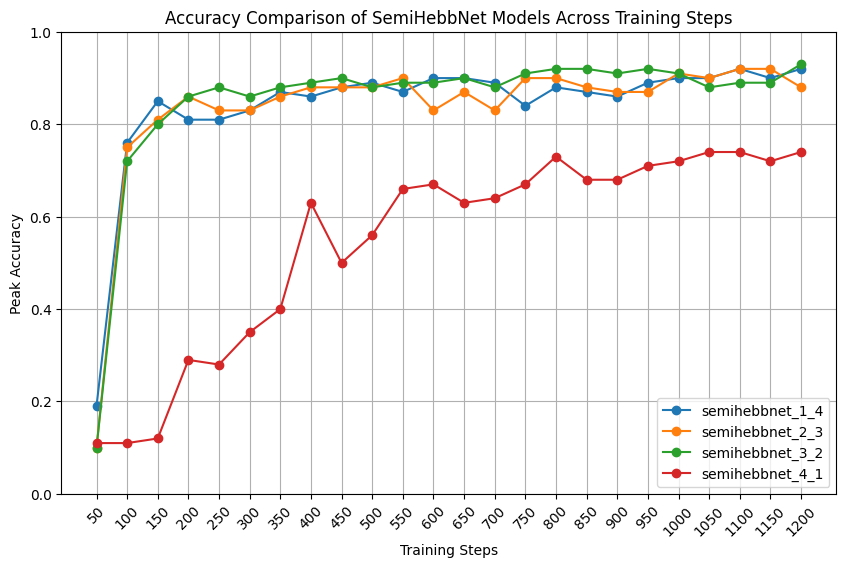

In [11]:
#plot
def plot_accuracy_comparison(accuracies, model_names):
    plt.figure(figsize=(10, 6))
    
    for i, model_accuracies in enumerate(accuracies):
        steps = [step * 50 for step in range(1, len(model_accuracies) + 1)]
        plt.plot(steps, model_accuracies, marker='o', label=model_names[i])

    plt.title('Accuracy Comparison of SemiHebbNet Models Across Training Steps')
    plt.xlabel('Training Steps')
    plt.ylabel('Peak Accuracy')
    plt.grid(True)
    plt.xticks(steps, rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

plot_accuracy_comparison(raw_accuracies, model_names)

# Model Performance on mnist with different gradient sparsity parameters p

x_axis: different gradient sparsity parameter p value
y_axis: performance--> Highest accuracy in one epoch

we only do this on the top 3 models in the last cell i.e. semihebbnet_1_4,semihebbnet_2_3, semihebbnet_3_2

60000
10000


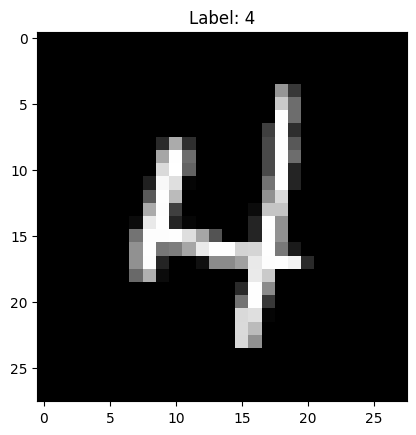

Epoch: 0, Step: 0, Loss: 2.302093982696533, Accuracy: 9.8%
Epoch: 0, Step: 50, Loss: 8.679027557373047, Accuracy: 12.58%
Epoch: 0, Step: 100, Loss: 1.3721034526824951, Accuracy: 48.84%
Epoch: 0, Step: 150, Loss: 1.0421078205108643, Accuracy: 66.27%
Epoch: 0, Step: 200, Loss: 1.0552566051483154, Accuracy: 69.52%
Epoch: 0, Step: 250, Loss: 0.6493848562240601, Accuracy: 77.66%
Epoch: 0, Step: 300, Loss: 1.498355507850647, Accuracy: 80.05%
Epoch: 0, Step: 350, Loss: 0.7404928803443909, Accuracy: 63.65%
Epoch: 0, Step: 400, Loss: 0.9349762797355652, Accuracy: 82.97%
Epoch: 0, Step: 450, Loss: 0.7119266390800476, Accuracy: 79.47%
Epoch: 0, Step: 500, Loss: 0.46719062328338623, Accuracy: 77.31%
Epoch: 0, Step: 550, Loss: 0.6531764268875122, Accuracy: 78.77%
Epoch: 0, Step: 600, Loss: 0.5173134803771973, Accuracy: 79.16%
Epoch: 0, Step: 650, Loss: 0.7796905636787415, Accuracy: 79.5%
Epoch: 0, Step: 700, Loss: 0.6806499361991882, Accuracy: 85.8%
Epoch: 0, Step: 750, Loss: 1.1236573457717896, Ac

In [2]:
p_values = [10,20,30,40,50,60,70,80,90]


torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1         
BATCH_SIZE = 50
LR = 0.001
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

raw_accuracies_1 = []
for p in p_values:
    # 1+4
    hebbnet = HebbNet([784,1000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=p)
    fcn = FCN([1000,2000,4000,2000,10])

    semihebbnet_1_4 = SemiHebbNet(hebbnet, fcn)
    model = semihebbnet_1_4

    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                 

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    accuracy = max(accuracies) 
    raw_accuracies_1.append(accuracy)

raw_accuracies_2 = []
for p in p_values:
    # 2+3
    hebbnet = HebbNet([784,1000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=p)
    fcn = FCN([2000,4000,2000,10])

    semihebbnet_2_3 = SemiHebbNet(hebbnet, fcn)
    model = semihebbnet_2_3

    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                 

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    accuracy = max(accuracies) 
    raw_accuracies_2.append(accuracy)

raw_accuracies_3 = []
for p in p_values:
    # 3+2
    hebbnet = HebbNet([784,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=p)
    fcn = FCN([4000,2000,10])

    semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)
    model = semihebbnet_3_2
    
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                 

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    accuracy = max(accuracies) 
    raw_accuracies_3.append(accuracy)


raw_accuracies = [raw_accuracies_1,raw_accuracies_2,raw_accuracies_3]

models = [semihebbnet_1_4,semihebbnet_2_3,semihebbnet_3_2]
model_names = ["semihebbnet_1_4","semihebbnet_2_3","semihebbnet_3_2"]

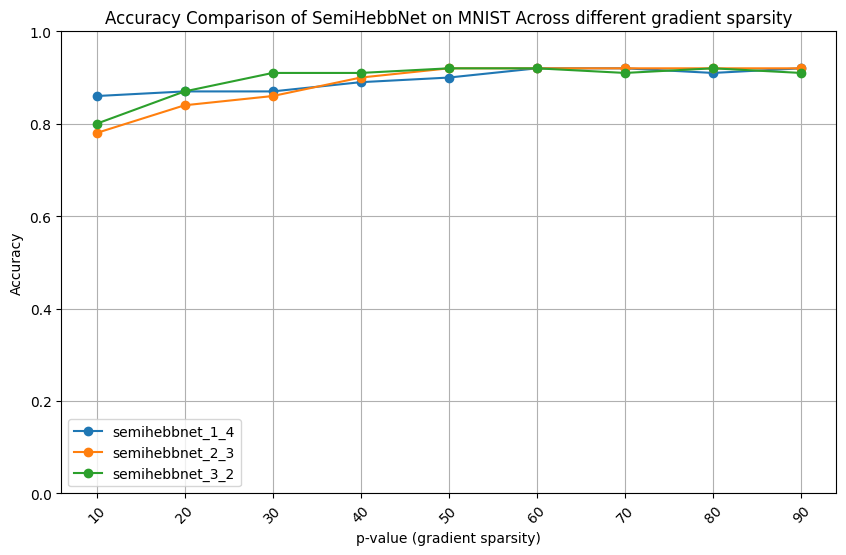

In [3]:
#plot
def plot_accuracy_comparison(accuracies, model_names):
    plt.figure(figsize=(10, 6))
    
    for i, model_accuracies in enumerate(accuracies):
        gradient_sparsity  = p_values
        plt.plot(gradient_sparsity, model_accuracies, marker='o', label=model_names[i])

    plt.title('Accuracy Comparison of SemiHebbNet on MNIST Across different gradient sparsity')
    plt.xlabel('p-value (gradient sparsity)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.xticks(gradient_sparsity, rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

plot_accuracy_comparison(raw_accuracies, model_names)

# Convergence Speed Comparison of SemiHebbNet (semihebbnet_3_2) with different Gradient Sparsity P

60000
10000


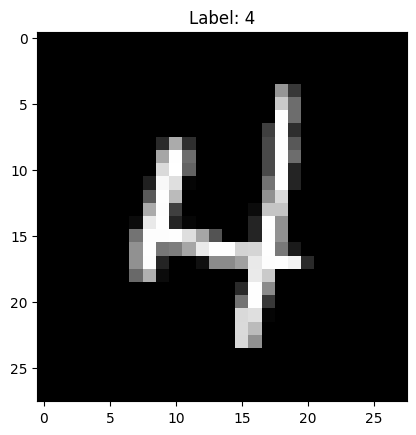

Epoch: 0, Step: 0, Loss: 2.302673101425171, Accuracy: 9.58%
Epoch: 0, Step: 50, Loss: 2.2299506664276123, Accuracy: 28.22%
Epoch: 0, Step: 100, Loss: 1.3052048683166504, Accuracy: 64.19%
Epoch: 0, Step: 150, Loss: 1.2378300428390503, Accuracy: 57.15%
Epoch: 0, Step: 200, Loss: 0.8807730078697205, Accuracy: 66.83%
Epoch: 0, Step: 250, Loss: 0.8788966536521912, Accuracy: 76.6%
Epoch: 0, Step: 300, Loss: 0.9541723728179932, Accuracy: 64.12%
Epoch: 0, Step: 350, Loss: 0.8535036444664001, Accuracy: 77.19%
Epoch: 0, Step: 400, Loss: 0.8579660654067993, Accuracy: 66.3%
Epoch: 0, Step: 450, Loss: 1.6812987327575684, Accuracy: 75.72%
Epoch: 0, Step: 500, Loss: 1.0391294956207275, Accuracy: 77.44%
Epoch: 0, Step: 550, Loss: 1.0417675971984863, Accuracy: 80.36%
Epoch: 0, Step: 600, Loss: 0.5724654197692871, Accuracy: 80.49%
Epoch: 0, Step: 650, Loss: 0.5091044902801514, Accuracy: 74.44%
Epoch: 0, Step: 700, Loss: 0.3975558876991272, Accuracy: 82.34%
Epoch: 0, Step: 750, Loss: 0.773206889629364, A

In [4]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1         
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

p_values = [20,40,60,80]
models = []
for p in p_values:
    # 3+2
    hebbnet = HebbNet([784,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=p)
    fcn = FCN([4000,2000,10])

    semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)
    models.append(semihebbnet_3_2)

model_names = ["semihebbnet with p=20","semihebbnet with p=40","semihebbnet with p=60","semihebbnet with p=80"]

raw_accuracies = []
for model in models:
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                  

    # train networks
    accuracies = train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 
    raw_accuracies.append(accuracies)



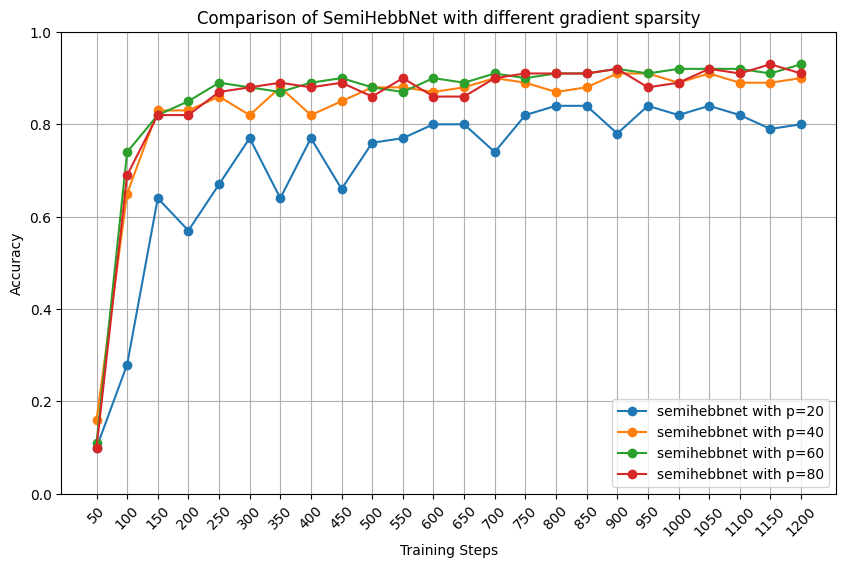

In [5]:
#plot
def plot_accuracy_comparison(accuracies, model_names):
    plt.figure(figsize=(10, 6))
    
    for i, model_accuracies in enumerate(accuracies):
        steps = [step * 50 for step in range(1, len(model_accuracies) + 1)]
        plt.plot(steps, model_accuracies, marker='o', label=model_names[i])

    plt.title('Comparison of SemiHebbNet with different gradient sparsity')
    plt.xlabel('Training Steps')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.xticks(steps, rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

plot_accuracy_comparison(raw_accuracies, model_names)